In [224]:
# Import Packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import missingno as msno
import warnings

# Ignores Warnings
warnings.filterwarnings('ignore')

# Pulls CrimeData_Project1 CSV file into a Data Frame
df = pd.read_csv('CrimeData_Project1.csv')
df


,INC_NUMBER,OCCURRED_ON,OCCURRED_TO,UCR_CRIME_CATEGORY,ONEHUNDRED_BLOCK_ADDR,ZIP,PREMISE_TYPE
0,2.020000e+14,11/1/15 0:00,1/9/16 0:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029,SINGLE FAMILY HOUSE
1,2.020000e+14,11/1/15 0:00,NaN,RAPE,13XX E ALMERIA RD,85006,SINGLE FAMILY HOUSE
2,2.020000e+14,11/1/15 0:00,11/1/15 9:00,LARCENY-THEFT,51XX N 15TH ST,85014,APARTMENT
3,2.020000e+14,11/1/15 0:00,11/1/15 5:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307,SINGLE FAMILY HOUSE
4,2.020000e+14,11/1/15 0:00,11/1/15 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043,SINGLE FAMILY HOUSE
...,...,...,...,...,...,...,...
351537,2.020000e+14,3/14/21 23:00,3/15/21 12:00,MOTOR VEHICLE THEFT,83XX N BLACK CANYON FWY,85051,HOTEL / MOTEL
351538,2.020000e+11,3/14/21 23:00,NaN,LARCENY-THEFT,71XX E KIERLAND BLVD,85254,PARKING GARAGE
351539,2.020000e+14,3/14/21 23:02,NaN,DRUG OFFENSE,11XX W HIGHLAND AVE,85013,STREET / ROADWAY / SIDEWALK
351540,2.020000e+14,3/14/21 23:30,3/15/21 9:00,BURGLARY,19XX W TIERRA BUENA LN,85023,CONDO / TOWNHOUSE


In [167]:
# Shows the name of all the columns, count of each field, and the data type

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351542 entries, 0 to 351541
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INC_NUMBER             351542 non-null  float64
 1   OCCURRED_ON            351123 non-null  object 
 2   OCCURRED_TO            236047 non-null  object 
 3   UCR_CRIME_CATEGORY     351542 non-null  object 
 4   ONEHUNDRED_BLOCK_ADDR  351542 non-null  object 
 5   ZIP                    351542 non-null  object 
 6   PREMISE_TYPE           351542 non-null  object 
dtypes: float64(1), object(6)
memory usage: 18.8+ MB


In [168]:
# Shows all the null values in each of the fields

df.isnull().sum()


INC_NUMBER                    0
OCCURRED_ON                 419
OCCURRED_TO              115495
UCR_CRIME_CATEGORY            0
ONEHUNDRED_BLOCK_ADDR         0
ZIP                           0
PREMISE_TYPE                  0
dtype: int64

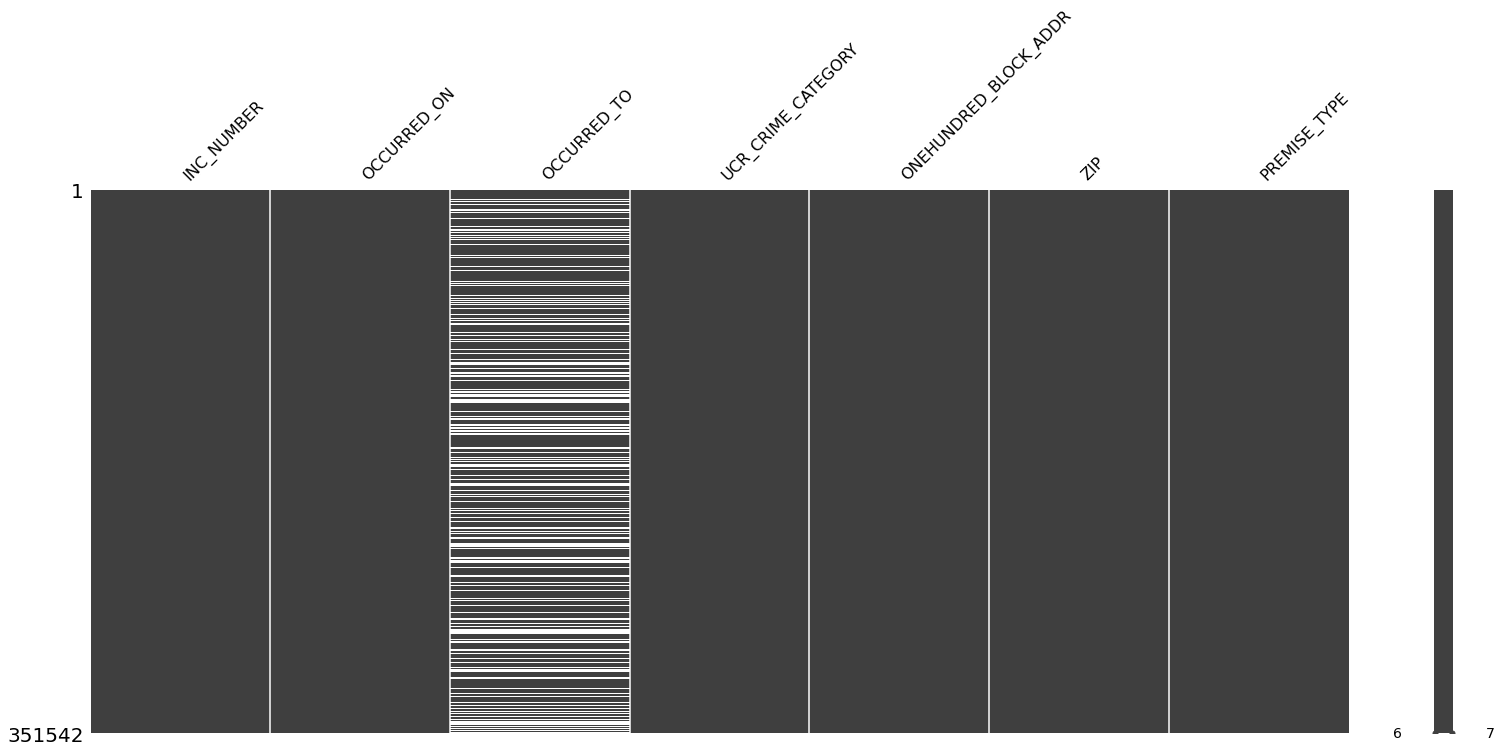

In [169]:
# Uses the missingno package to show the fields that have nulls

msno.matrix(df)
plt.show()


In [170]:
# Drops the fields that are not needed

df.drop(columns=['INC_NUMBER','OCCURRED_TO','ONEHUNDRED_BLOCK_ADDR'],inplace=True)

df


,OCCURRED_ON,UCR_CRIME_CATEGORY,ZIP,PREMISE_TYPE
0,11/1/15 0:00,MOTOR VEHICLE THEFT,85029,SINGLE FAMILY HOUSE
1,11/1/15 0:00,RAPE,85006,SINGLE FAMILY HOUSE
2,11/1/15 0:00,LARCENY-THEFT,85014,APARTMENT
3,11/1/15 0:00,MOTOR VEHICLE THEFT,85307,SINGLE FAMILY HOUSE
4,11/1/15 0:00,MOTOR VEHICLE THEFT,85043,SINGLE FAMILY HOUSE
...,...,...,...,...
351537,3/14/21 23:00,MOTOR VEHICLE THEFT,85051,HOTEL / MOTEL
351538,3/14/21 23:00,LARCENY-THEFT,85254,PARKING GARAGE
351539,3/14/21 23:02,DRUG OFFENSE,85013,STREET / ROADWAY / SIDEWALK
351540,3/14/21 23:30,BURGLARY,85023,CONDO / TOWNHOUSE


In [171]:
# Converts the different parts of the OCCURRED_ON field to year, month, hour, and dayofweek fields

df['OCCURRED_ON'] = df[['OCCURRED_ON']].apply(pd.to_datetime)

column_1 = df.iloc[:,0]

sdate = pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "hour": column_1.dt.hour,
              "dayofweek": column_1.dt.dayofweek,
             })

sdate


,year,month,hour,dayofweek
0,2015.0,11.0,0.0,6.0
1,2015.0,11.0,0.0,6.0
2,2015.0,11.0,0.0,6.0
3,2015.0,11.0,0.0,6.0
4,2015.0,11.0,0.0,6.0
...,...,...,...,...
351537,2021.0,3.0,23.0,6.0
351538,2021.0,3.0,23.0,6.0
351539,2021.0,3.0,23.0,6.0
351540,2021.0,3.0,23.0,6.0


In [172]:
# combines the date information that was just created with the main datafram df

data =pd.concat([sdate,df],axis=1)

data


,year,month,hour,dayofweek,OCCURRED_ON,UCR_CRIME_CATEGORY,ZIP,PREMISE_TYPE
0,2015.0,11.0,0.0,6.0,2015-11-01 00:00:00,MOTOR VEHICLE THEFT,85029,SINGLE FAMILY HOUSE
1,2015.0,11.0,0.0,6.0,2015-11-01 00:00:00,RAPE,85006,SINGLE FAMILY HOUSE
2,2015.0,11.0,0.0,6.0,2015-11-01 00:00:00,LARCENY-THEFT,85014,APARTMENT
3,2015.0,11.0,0.0,6.0,2015-11-01 00:00:00,MOTOR VEHICLE THEFT,85307,SINGLE FAMILY HOUSE
4,2015.0,11.0,0.0,6.0,2015-11-01 00:00:00,MOTOR VEHICLE THEFT,85043,SINGLE FAMILY HOUSE
...,...,...,...,...,...,...,...,...
351537,2021.0,3.0,23.0,6.0,2021-03-14 23:00:00,MOTOR VEHICLE THEFT,85051,HOTEL / MOTEL
351538,2021.0,3.0,23.0,6.0,2021-03-14 23:00:00,LARCENY-THEFT,85254,PARKING GARAGE
351539,2021.0,3.0,23.0,6.0,2021-03-14 23:02:00,DRUG OFFENSE,85013,STREET / ROADWAY / SIDEWALK
351540,2021.0,3.0,23.0,6.0,2021-03-14 23:30:00,BURGLARY,85023,CONDO / TOWNHOUSE


In [173]:
# Removes 2015 and 2021 from the main dataframe

data = data[data.year > 2015]
data = data[data.year < 2021]

# Removes all of the ZIP Codes that have a zero
data = data[data.ZIP != 0]

#Splits out each year into separate dataframes
data16 = data[data.year > 2016]
data17 = data[data.year < 2017]
data18 = data[data.year > 2018]
data19 = data[data.year < 2019]
data20 = data[data.year > 2020]


In [174]:
# Shows the count, mean, std, min, and percentiles for year, month, hour, and dayofweek

data.describe()


,year,month,hour,dayofweek
count,327407.000000,327407.000000,327407.000000,327407.000000
mean,2018.016090,6.537120,12.535920,2.947035
std,1.404456,3.472495,7.057189,1.971793
min,2016.000000,1.000000,0.000000,0.000000
25%,2017.000000,4.000000,7.000000,1.000000
50%,2018.000000,7.000000,14.000000,3.000000
75%,2019.000000,10.000000,18.000000,5.000000
max,2020.000000,12.000000,23.000000,6.000000


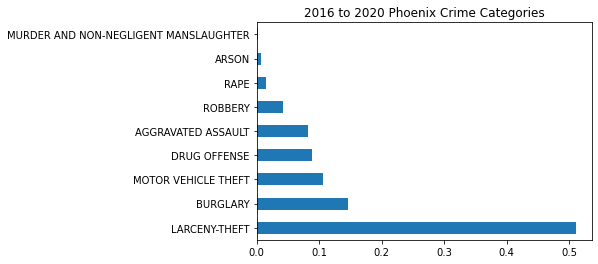

In [228]:
# There are more Larceny-Theft crimes than another other crimes

# Counts and normalizes the UCR_CRIME_CATEGORY field
data.UCR_CRIME_CATEGORY.value_counts(normalize=True)

#Plots the bar graph of Crime Categories
data.UCR_CRIME_CATEGORY.value_counts(normalize=True).plot.barh()
plt.title('2016 to 2020 Phoenix Crime Categories')
plt.show()


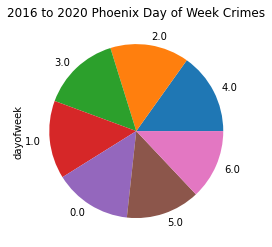

In [229]:
# Crime seems to be pretty equal every day of the week

# Counts and normalizes the dayofweek field
data.dayofweek.value_counts(normalize=True)

#plot the pie chart of education categories
data.dayofweek.value_counts(normalize=True).plot.pie()
plt.title('2016 to 2020 Phoenix Day of Week Crimes')
plt.show()


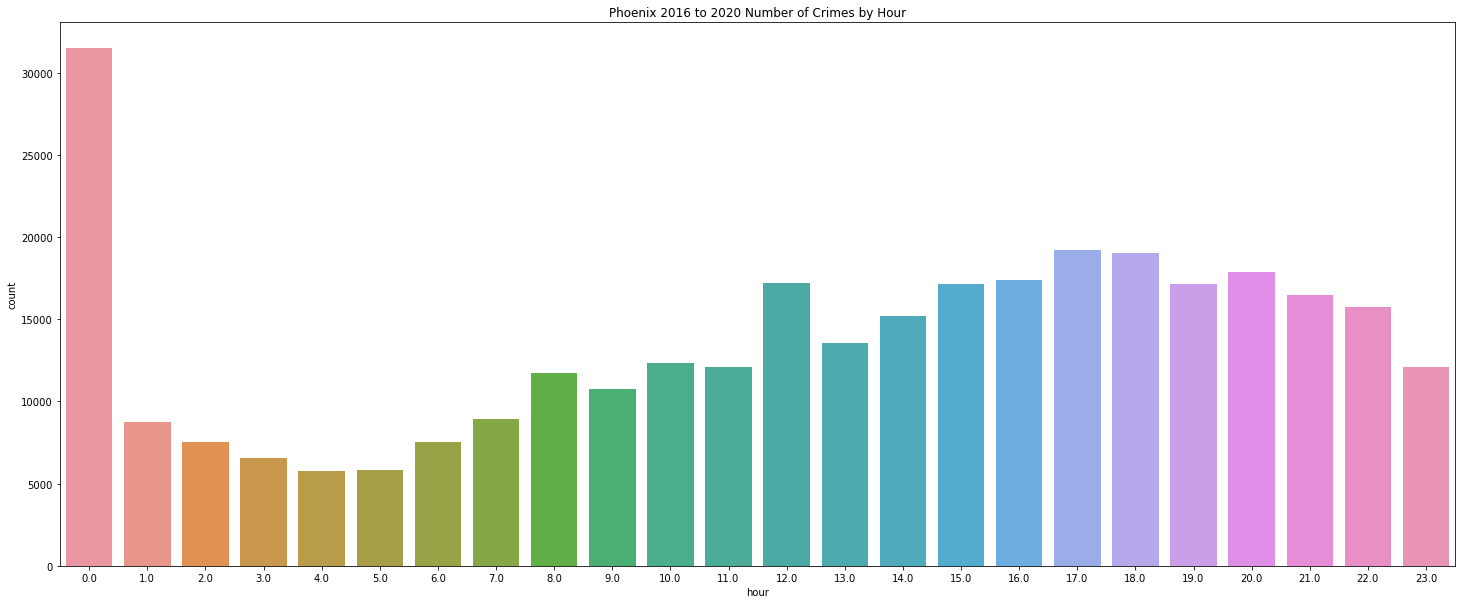

In [230]:
# Plots the number of Crimes by Hour

plt.figure(figsize=(25,10))
plt.title('Phoenix 2016 to 2020 Number of Crimes by Hour')
ax = sns.countplot(x="hour", data=data,
                   linewidth=3)


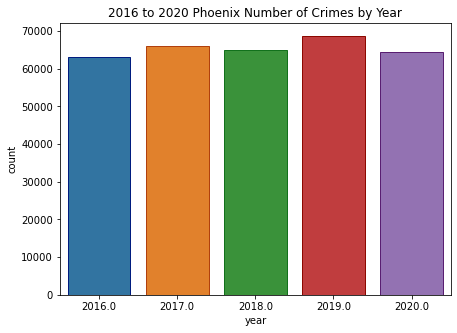

In [231]:
# Plots the number of crimes by year

plt.figure(figsize=(7,5))
plt.title('2016 to 2020 Phoenix Number of Crimes by Year')
ax = sns.countplot(x="year", data=data,
                   edgecolor=sns.color_palette("dark", 24))


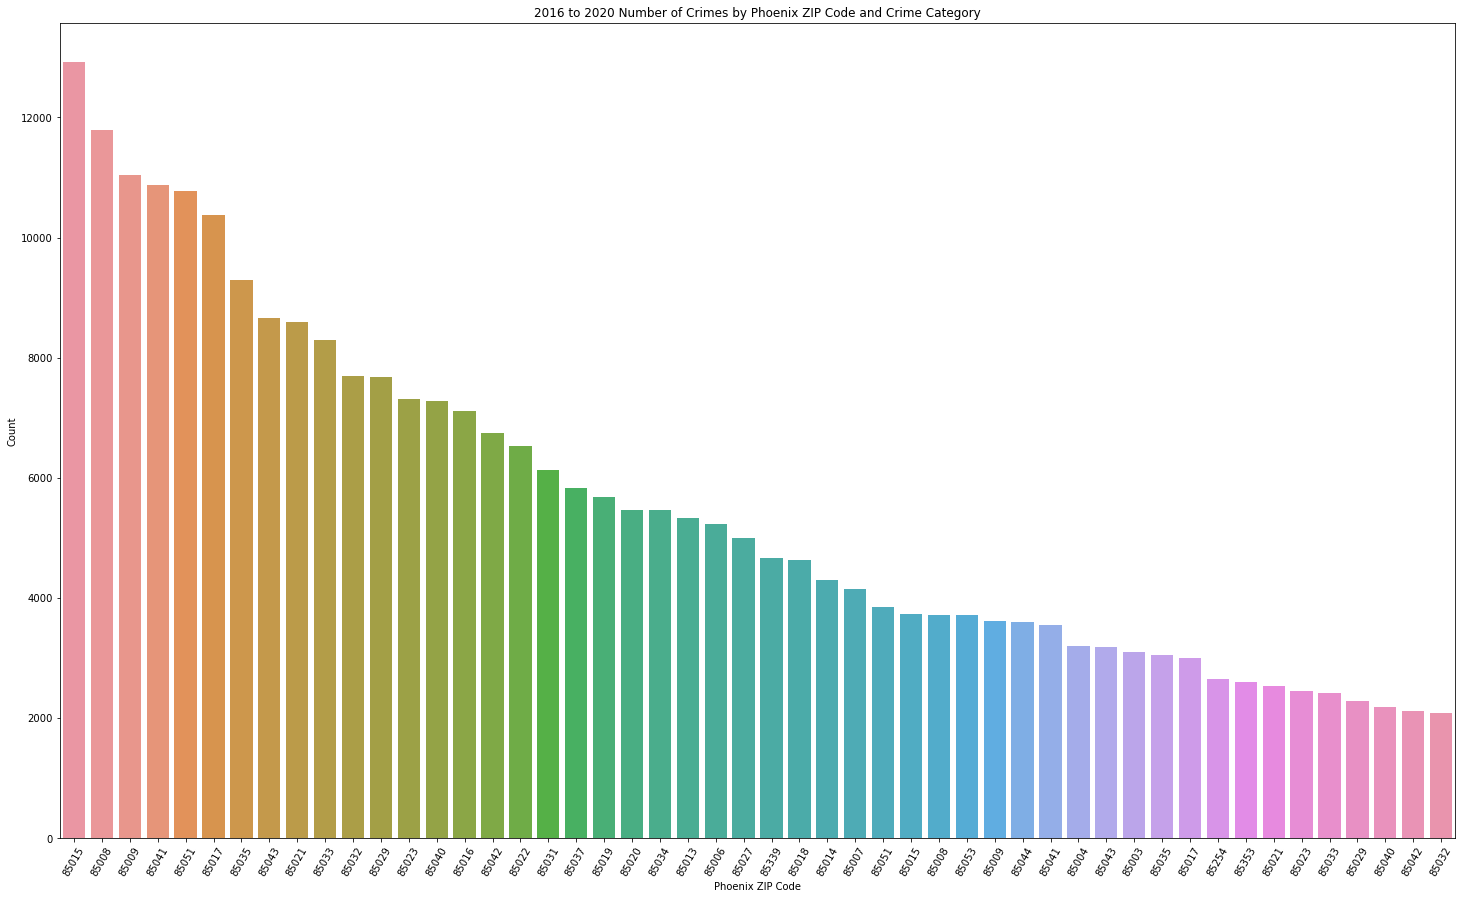

In [232]:
# Evaluates and plots the number of crimes by ZIP Code and Crime Category

df2 = pd.DataFrame(columns = ['UCR_CRIME_CATEGORY'])
df2["UCR_CRIME_CATEGORY"]=[each for each in data.ZIP.unique()]
df2["Count"]=[len(data[data.ZIP==each]) for each in df2.UCR_CRIME_CATEGORY]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.UCR_CRIME_CATEGORY.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 60)
plt.title('2016 to 2020 Number of Crimes by Phoenix ZIP Code and Crime Category')
plt.xlabel('Phoenix ZIP Code')
plt.ylabel('Count')
plt.show()


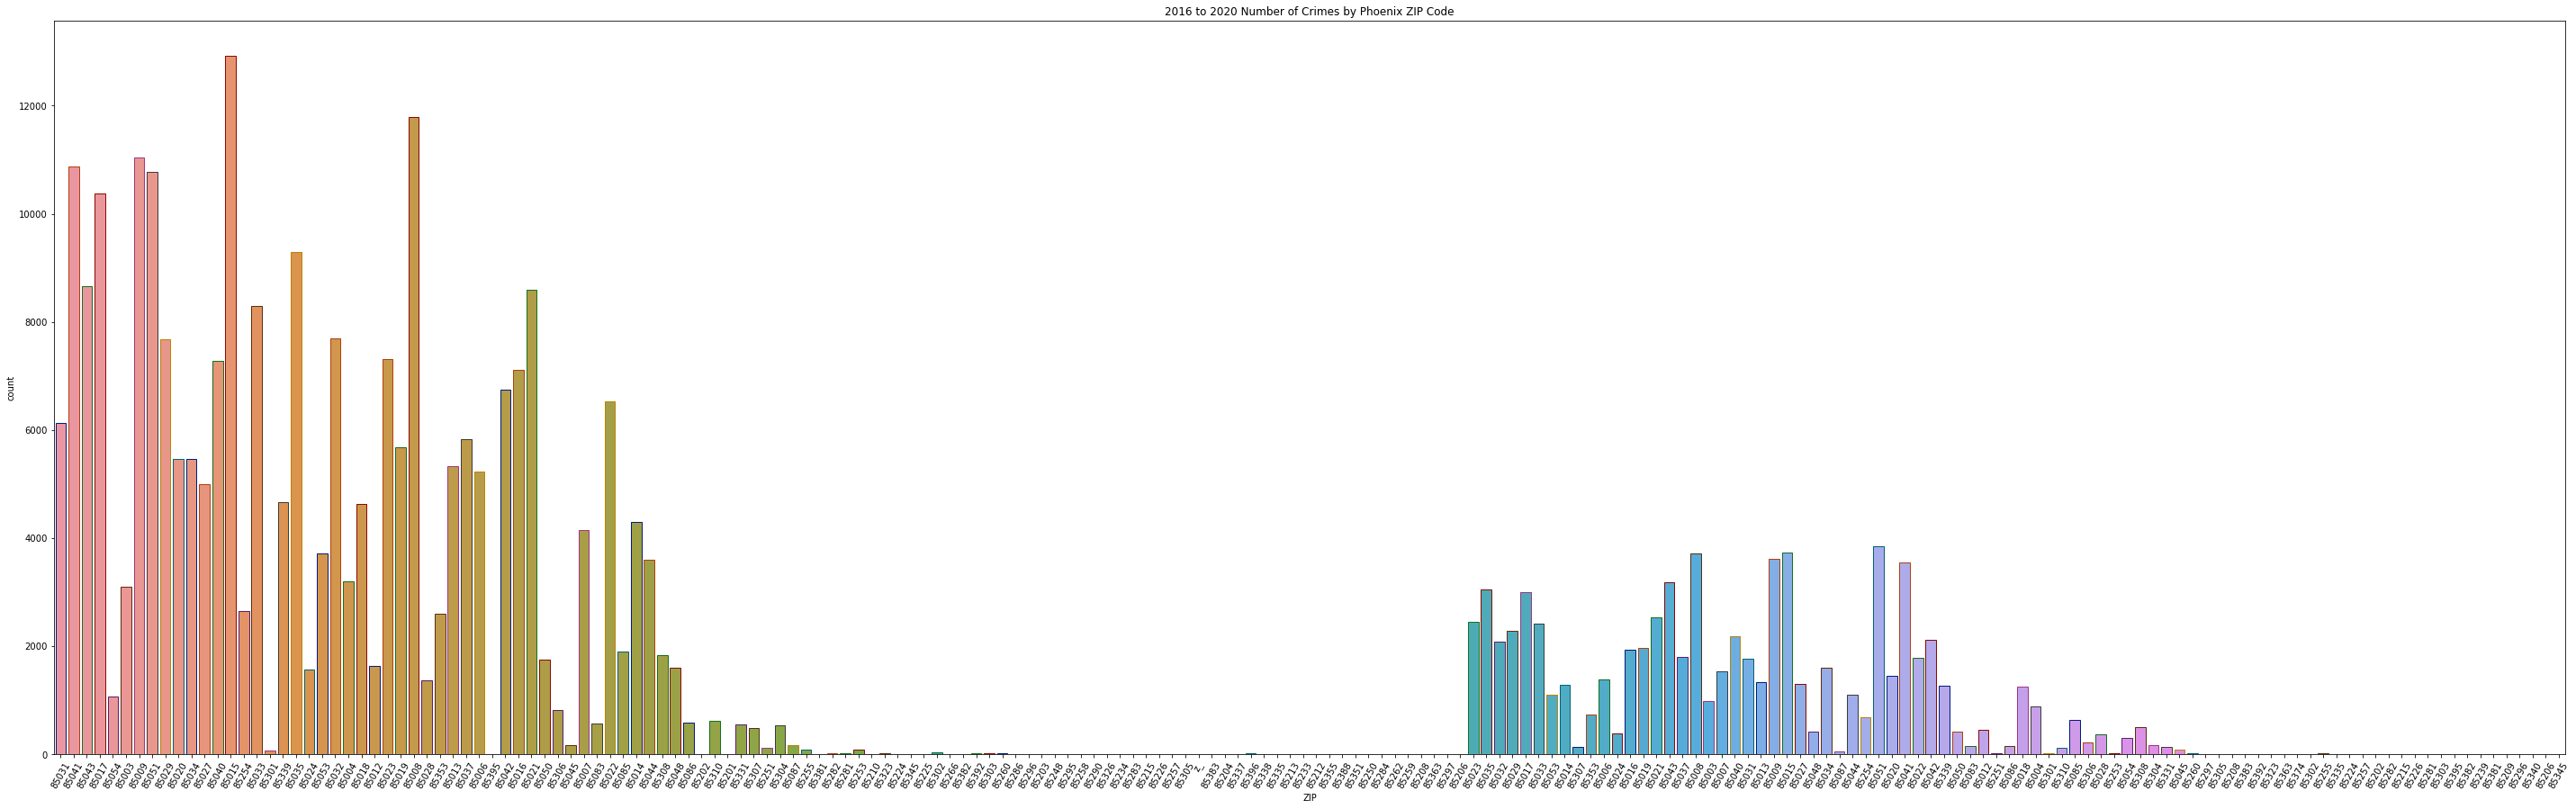

In [233]:
# Plots the number of crimes by ZIP Code

plt.figure(figsize=(50,15))
plt.title('2016 to 2020 Number of Crimes by Phoenix ZIP Code')
plt.xticks(rotation= 60)
ax = sns.countplot(x="ZIP", data=data,
                   edgecolor=sns.color_palette("dark", 24))


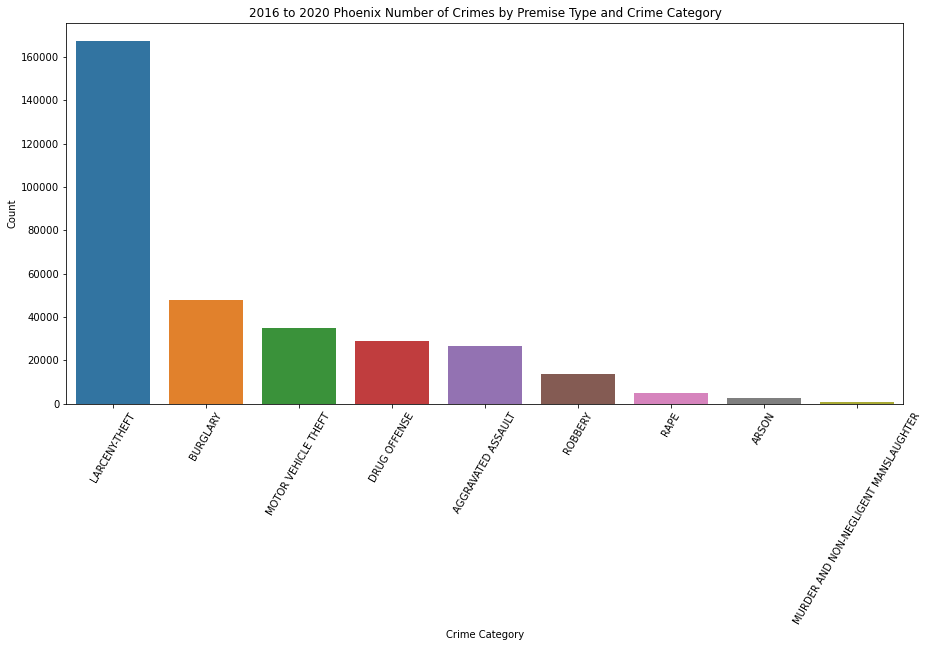

In [234]:
# Evaluates and plots the number of crimes by Premise Type and Crime Category

df2 = pd.DataFrame(columns = ['PREMISE_TYPE'])
df2["PREMISE_TYPE"]=[each for each in data.UCR_CRIME_CATEGORY.unique()]
df2["Count"]=[len(data[data.UCR_CRIME_CATEGORY==each]) for each in df2.PREMISE_TYPE]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(15,7))
sns.barplot(x=df2.PREMISE_TYPE.head(50), y=df2.Count.head(50))
plt.title('2016 to 2020 Phoenix Number of Crimes by Premise Type and Crime Category')
plt.xticks(rotation= 60)
plt.xlabel('Crime Category')
plt.ylabel('Count')
plt.show()


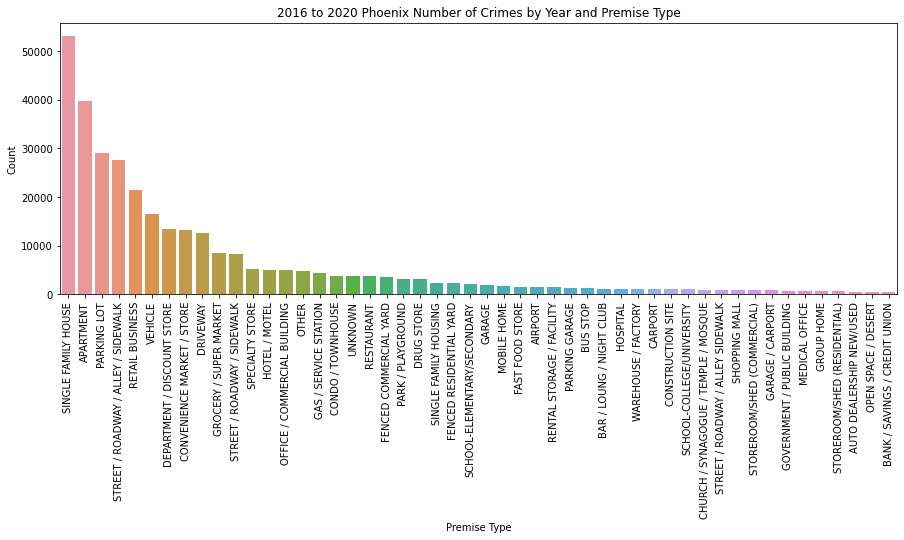

In [235]:
# Evaluates and plots the number of crimes by Year and Premise Type

df2 = pd.DataFrame(columns = ['year'])
df2["year"]=[each for each in data.PREMISE_TYPE.unique()]
df2["Count"]=[len(data[data.PREMISE_TYPE==each]) for each in df2.year]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(15,5))
plt.title('2016 to 2020 Phoenix Number of Crimes by Year and Premise Type')
sns.barplot(x=df2.year.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Premise Type')
plt.ylabel('Count')
plt.show()


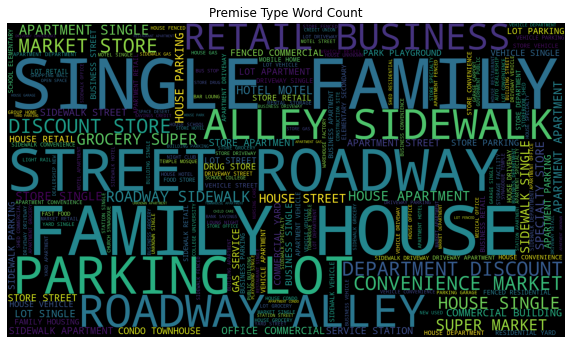

In [213]:
# Identifies the word count by Premise Type and makes the words with the most counts larger

plt.figure(figsize=(10,10))
plt.title('Premise Type Word Count')
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.PREMISE_TYPE))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()


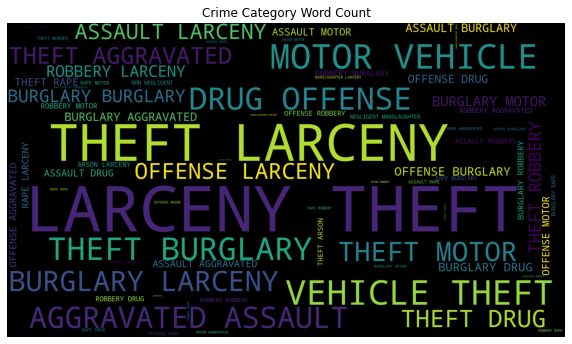

In [214]:
# Identifies the word count by Crime Category and makes the words with the most counts larger

plt.figure(figsize=(10,10))
plt.title('Crime Category Word Count')
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.UCR_CRIME_CATEGORY))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()


In [215]:
# Counts crimes by 2016 ZIP Codes

zipcode = data[data.year == 2016.0].groupby(['year','ZIP']).count()
zipcode.sort_values('month').tail(10)


month  hour  dayofweek  OCCURRED_ON  UCR_CRIME_CATEGORY  \
year   ZIP                                                              
2016.0 85032   2018  2018       2018         2018                2018   
       85033   2031  2031       2031         2031                2031   
       85021   2035  2035       2035         2035                2035   
       85035   2164  2164       2164         2164                2164   
       85017   2512  2512       2512         2512                2512   
       85009   2554  2554       2554         2554                2554   
       85041   2590  2590       2590         2590                2590   
       85051   2661  2661       2661         2661                2661   
       85008   3034  3034       3034         3034                3034   
       85015   3448  3448       3448         3448                3448   

              PREMISE_TYPE  
year   ZIP                  
2016.0 85032          2018  
       85033          2031  
       85021          2035  
       85035          2164  
       85017          2512  
       85009          2554  
       85041          2590  
       85051          2661  
       85008          3034  
       85015          3448

In [220]:
# Counts crimes by 2017 ZIP Codes

zipcode17 = data[data.year == 2017.0].groupby(['year','ZIP']).count()
zipcode17.sort_values('month').tail(10)


month  hour  dayofweek  OCCURRED_ON  UCR_CRIME_CATEGORY  \
year   ZIP                                                              
2017.0 85032   2184  2184       2184         2184                2184   
       85021   2217  2217       2217         2217                2217   
       85043   2317  2317       2317         2317                2317   
       85035   2469  2469       2469         2469                2469   
       85051   2646  2646       2646         2646                2646   
       85017   2713  2713       2713         2713                2713   
       85041   2795  2795       2795         2795                2795   
       85009   2839  2839       2839         2839                2839   
       85008   3304  3304       3304         3304                3304   
       85015   3308  3308       3308         3308                3308   

              PREMISE_TYPE  
year   ZIP                  
2017.0 85032          2184  
       85021          2217  
       85043          2317  
       85035          2469  
       85051          2646  
       85017          2713  
       85041          2795  
       85009          2839  
       85008          3304  
       85015          3308

In [221]:
# Counts crimes by 2018 ZIP Codes

zipcode18 = data[data.year == 2018.0].groupby(['year','ZIP']).count()
zipcode18.sort_values('month').tail(10)


month  hour  dayofweek  OCCURRED_ON  UCR_CRIME_CATEGORY  \
year   ZIP                                                              
2018.0 85033   2150  2150       2150         2150                2150   
       85043   2266  2266       2266         2266                2266   
       85021   2377  2377       2377         2377                2377   
       85035   2379  2379       2379         2379                2379   
       85017   2558  2558       2558         2558                2558   
       85041   2758  2758       2758         2758                2758   
       85051   2799  2799       2799         2799                2799   
       85008   2942  2942       2942         2942                2942   
       85009   2980  2980       2980         2980                2980   
       85015   3374  3374       3374         3374                3374   

              PREMISE_TYPE  
year   ZIP                  
2018.0 85033          2150  
       85043          2266  
       85021          2377  
       85035          2379  
       85017          2558  
       85041          2758  
       85051          2799  
       85008          2942  
       85009          2980  
       85015          3374

In [222]:
# Counts crimes by 2019 ZIP Codes

zipcode19 = data[data.year == 2019.0].groupby(['year','ZIP']).count()
zipcode19.sort_values('month').tail(10)


month  hour  dayofweek  OCCURRED_ON  UCR_CRIME_CATEGORY  \
year   ZIP                                                              
2019.0 85021   1958  1958       1958         1958                1958   
       85033   2013  2013       2013         2013                2013   
       85043   2098  2098       2098         2098                2098   
       85035   2286  2286       2286         2286                2286   
       85008   2518  2518       2518         2518                2518   
       85017   2589  2589       2589         2589                2589   
       85009   2662  2662       2662         2662                2662   
       85051   2672  2672       2672         2672                2672   
       85041   2740  2740       2740         2740                2740   
       85015   2800  2800       2800         2800                2800   

              PREMISE_TYPE  
year   ZIP                  
2019.0 85021          1958  
       85033          2013  
       85043          2098  
       85035          2286  
       85008          2518  
       85017          2589  
       85009          2662  
       85051          2672  
       85041          2740  
       85015          2800

In [223]:
# Counts crimes by 2020 ZIP Codes

zipcode20 = data[data.year == 2020.0].groupby(['year','ZIP']).count()
zipcode20.sort_values('month').tail(10)


month  hour  dayofweek  OCCURRED_ON  UCR_CRIME_CATEGORY  \
year   ZIP                                                              
2020.0 85023   2092  2092       2092         2092                2092   
       85021   2142  2142       2142         2142                2142   
       85017   2533  2533       2533         2533                2533   
       85035   2654  2654       2654         2654                2654   
       85043   2715  2715       2715         2715                2715   
       85041   2929  2929       2929         2929                2929   
       85009   3118  3118       3118         3118                3118   
       85015   3206  3206       3206         3206                3206   
       85008   3212  3212       3212         3212                3212   
       85051   3278  3278       3278         3278                3278   

              PREMISE_TYPE  
year   ZIP                  
2020.0 85023          2092  
       85021          2142  
       85017          2533  
       85035          2654  
       85043          2715  
       85041          2929  
       85009          3118  
       85015          3206  
       85008          3212  
       85051          3278